In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [3]:
path="/content/drive/MyDrive/Colab Notebooks/Walmart.csv"
walmart=pd.read_csv(path)
walmart.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [4]:
walmart.info

<bound method DataFrame.info of             Order ID  Order Date   Ship Date    Customer Name        Country  \
0     CA-2013-152156  09-11-2013  12-11-2013      Claire Gute  United States   
1     CA-2013-152156  09-11-2013  12-11-2013      Claire Gute  United States   
2     CA-2013-138688  13-06-2013  17-06-2013  Darrin Van Huff  United States   
3     US-2012-108966  11-10-2012  18-10-2012   Sean O'Donnell  United States   
4     US-2012-108966  11-10-2012  18-10-2012   Sean O'Donnell  United States   
...              ...         ...         ...              ...            ...   
9992  CA-2014-121258  27-02-2014  04-03-2014      Dave Brooks  United States   
9993  CA-2014-121258  27-02-2014  04-03-2014      Dave Brooks  United States   
9994             NaN         NaN         NaN              NaN            NaN   
9995             NaN         NaN         NaN              NaN            NaN   
9996  CA-2014-119914  05-05-2014  10-05-2014     Chris Cortes  United States   

       

In [5]:
print("Rows", walmart.shape[0])
print("Columns", walmart.shape[1])

Rows 9997
Columns 16


In [6]:
walmart.dtypes

Order ID          object
Order Date        object
Ship Date         object
Customer Name     object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity         float64
Discount         float64
Profit           float64
dtype: object

In [7]:
walmart.isna().sum()

Order ID         13
Order Date       13
Ship Date        13
Customer Name    13
Country          13
City             13
State            13
Postal Code      12
Region           13
Category         13
Sub-Category     13
Product Name     13
Sales            14
Quantity         13
Discount         13
Profit           13
dtype: int64

In [8]:
# Remove rows with any null values
walmart = walmart.dropna()
print(walmart)

            Order ID  Order Date   Ship Date    Customer Name        Country  \
0     CA-2013-152156  09-11-2013  12-11-2013      Claire Gute  United States   
1     CA-2013-152156  09-11-2013  12-11-2013      Claire Gute  United States   
2     CA-2013-138688  13-06-2013  17-06-2013  Darrin Van Huff  United States   
3     US-2012-108966  11-10-2012  18-10-2012   Sean O'Donnell  United States   
4     US-2012-108966  11-10-2012  18-10-2012   Sean O'Donnell  United States   
...              ...         ...         ...              ...            ...   
9990  CA-2014-121258  27-02-2014  04-03-2014      Dave Brooks  United States   
9991  CA-2014-121258  27-02-2014  04-03-2014      Dave Brooks  United States   
9992  CA-2014-121258  27-02-2014  04-03-2014      Dave Brooks  United States   
9993  CA-2014-121258  27-02-2014  04-03-2014      Dave Brooks  United States   
9996  CA-2014-119914  05-05-2014  10-05-2014     Chris Cortes  United States   

                 City       State  Post

In [9]:
walmart.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Customer Name    0
Country          0
City             0
State            0
Postal Code      0
Region           0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
walmart['Country'].unique()

array(['United States', 'USA'], dtype=object)

In [11]:
#replacing "USA" with "United states" in Country column
walmart = pd.DataFrame(walmart)
walmart['Country'] = walmart['Country'].replace(['USA', 'United States'])

In [12]:
walmart['Country'].unique()

array(['United States'], dtype=object)

In [13]:
walmart['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [14]:
walmart['Category'].value_counts()

Office Supplies    6020
Furniture          2119
Technology         1844
Name: Category, dtype: int64

In [15]:
walmart['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [16]:
walmart['Sub-Category'].value_counts()

Binders        1520
Paper          1368
Furnishings     956
Phones          888
Storage         846
Art             796
Accessories     774
Chairs          617
Appliances      465
Labels          364
Tables          318
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        114
Copiers          68
Name: Sub-Category, dtype: int64

**Understanding the central tendencies**

In [17]:
#checking null values in Sales column
walmart= pd.DataFrame(walmart)
null=walmart["Sales"].isna().value_counts()
print(null)

False    9983
Name: Sales, dtype: int64


In [18]:
mean_sales=walmart['Sales'].mean()
walmart['Sales'].fillna(mean_sales, inplace=True)

In [19]:
walmart["Sales"].isna().value_counts()

False    9983
Name: Sales, dtype: int64

In [20]:
print("Maximun Sales=",walmart["Sales"].max())
print("Minimun Sales=",walmart["Sales"].min())

Maximun Sales= 22638.48
Minimun Sales= 0.444


In [21]:
print("Maximun Profit=",walmart["Profit"].max())
print("Minimun Profit=",walmart["Profit"].min())

Maximun Profit= 8399.976
Minimun Profit= -6599.978


In [22]:
#mean value of sales column
print("Average Sales", walmart["Sales"].mean())

Average Sales 229.7878046979866


In [23]:
#Standard Deviation of sales column
print("Standard Deviation", walmart["Sales"].std())
#here the spread of the data is large due to SD>Mean

Standard Deviation 623.4191215790974


In [24]:
walmart.groupby("Category")["Sales"].max().sort_values(ascending=False)
#maximun Sales from Category

Category
Technology         22638.480
Office Supplies     9892.740
Furniture           4416.174
Name: Sales, dtype: float64

In [25]:
walmart.groupby("Category")["Sales"].min().sort_values(ascending=False)
#minimun Sales from Category

Category
Furniture          1.892
Technology         0.990
Office Supplies    0.444
Name: Sales, dtype: float64

In [26]:
walmart.groupby("Category")["Profit"].max().sort_values(ascending=False)
#maximun Profit from category

Category
Technology         8399.976
Office Supplies    4946.370
Furniture          1013.127
Name: Profit, dtype: float64

In [27]:
walmart.groupby("Category")["Profit"].min().sort_values(ascending=False)
#minimun Profit from category

Category
Furniture         -1862.3124
Office Supplies   -3701.8928
Technology        -6599.9780
Name: Profit, dtype: float64

In [28]:
walmart.groupby("Customer Name")["Sales"].max().sort_values(ascending=False).head()
#top 5 Customer with max sales

Customer Name
Sean Miller     22638.480
Tamara Chand    17499.950
Raymond Buch    13999.960
Tom Ashbrook    11199.968
Hunter Lopez    10499.970
Name: Sales, dtype: float64

In [29]:
walmart.groupby("Customer Name")["Profit"].max().sort_values(ascending=False).head()
#Top 5 Customer with max Profit

Customer Name
Tamara Chand     8399.9760
Raymond Buch     6719.9808
Hunter Lopez     5039.9856
Adrian Barton    4946.3700
Sanjit Chand     4630.4755
Name: Profit, dtype: float64

In [30]:
print("Top 5 City with highest Profit",walmart.groupby("City")["Profit"].max().sort_values(ascending=False).head())

Top 5 City with highest Profit City
Lafayette      8399.9760
Seattle        6719.9808
Newark         5039.9856
Detroit        4946.3700
Minneapolis    4630.4755
Name: Profit, dtype: float64


In [31]:
# Find the city with the highest total profit
highest_profit_city = walmart[walmart["Profit"] == walmart["Profit"].max()]

# Print the city with the highest profit
print("City with the highest profit with all the details:")
print(highest_profit_city)
#cross check from the above 3 outputs

City with the highest profit with all the details:
            Order ID  Order Date   Ship Date Customer Name        Country  \
6826  CA-2013-118689  03-10-2013  10-10-2013  Tamara Chand  United States   

           City    State  Postal Code   Region    Category Sub-Category  \
6826  Lafayette  Indiana      47905.0  Central  Technology      Copiers   

                               Product Name     Sales  Quantity  Discount  \
6826  Canon imageCLASS 2200 Advanced Copier  17499.95       5.0       0.0   

        Profit  
6826  8399.976  


In [32]:
#Top 5 profitable and non-profitable products
product_profit = print("Most Profitable",walmart.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head())
print(product_profit)
least_profit = print("Least Profitable",walmart.groupby('Product Name')['Profit'].sum().sort_values(ascending=True).head())
print(least_profit)

Most Profitable Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Name: Profit, dtype: float64
None
Least Profitable Product Name
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Bush Advantage Collection Racetrack Conference Table       -1934.3976
Name: Profit, dtype: float64
None


In [33]:
#Statistical Summary through table using aggrigate function
walmart.agg(
    {
    "Sales":["min", "max","mean"],
    "Profit":["min", "max","mean"]
    }
)

,Sales,Profit
min,0.444000,-6599.978000
max,22638.480000,8399.976000
mean,229.787805,28.682607


**Finding Correlation**

In [34]:
walmart['Sales'].corr(walmart['Quantity'])

0.201123100024671

In [35]:
walmart['Quantity'].corr(walmart['Profit'])

0.0663468210221917

In [36]:
walmart['Discount'].corr(walmart['Profit'])

-0.21935917522442527

In [37]:
walmart.corr() #using corr() function

<ipython-input-37-77a9cb43bf62>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  walmart.corr() #using corr() function


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023650,0.012497,0.058096,-0.029873
Sales,-0.023650,1.000000,0.201123,-0.028021,0.479143
Quantity,0.012497,0.201123,1.000000,0.007804,0.066347
Discount,0.058096,-0.028021,0.007804,1.000000,-0.219359
Profit,-0.029873,0.479143,0.066347,-0.219359,1.000000


**Kurtosis**

In [38]:
#Kurtosis
walmart.kurt()

<ipython-input-38-a7139c28e432>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  walmart.kurt()


Postal Code     -1.493248
Sales          305.311764
Quantity         1.998331
Discount         2.418906
Profit         396.910218
dtype: float64

In [39]:
walmart["Sales"].kurt()

305.3117635577835

In [40]:
walmart["Quantity"].kurt()

1.9983305211872198

In [41]:
walmart["Profit"].kurt()

396.910217756971

In [42]:
walmart["Discount"].kurt()

2.4189063702559634

**Skewness**

In [43]:
#Skewness
walmart.skew()

<ipython-input-43-f9b2e7b06786>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  walmart.skew()


Postal Code    -0.128879
Sales          12.975758
Quantity        1.279952
Discount        1.685860
Profit          7.559241
dtype: float64

In [44]:
walmart["Sales"].skew()

12.975757569679688

In [45]:
walmart["Quantity"].skew()

1.2799517000794787

In [46]:
walmart["Discount"].skew()

1.6858596835055906

In [47]:
walmart["Profit"].skew()

7.559240639788513

In [48]:
walmart.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9983.000000,9983.000000,9983.000000,9983.000000,9983.000000
mean,55200.530702,229.787805,3.788240,0.155984,28.682607
std,32067.508195,623.419122,2.224802,0.206211,234.364907
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.734300
50%,56560.000000,54.384000,3.000000,0.200000,8.671500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [49]:
#walmart.describe(include="O")

In [50]:
walmart["Profit"]=walmart["Profit"].astype('int64') #changing the datatype of "Profit" and "Quantity" into integer
walmart["Quantity"]=walmart["Quantity"].astype('int64')
walmart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9983 entries, 0 to 9996
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9983 non-null   object 
 1   Order Date     9983 non-null   object 
 2   Ship Date      9983 non-null   object 
 3   Customer Name  9983 non-null   object 
 4   Country        9983 non-null   object 
 5   City           9983 non-null   object 
 6   State          9983 non-null   object 
 7   Postal Code    9983 non-null   float64
 8   Region         9983 non-null   object 
 9   Category       9983 non-null   object 
 10  Sub-Category   9983 non-null   object 
 11  Product Name   9983 non-null   object 
 12  Sales          9983 non-null   float64
 13  Quantity       9983 non-null   int64  
 14  Discount       9983 non-null   float64
 15  Profit         9983 non-null   int64  
dtypes: float64(3), int64(2), object(11)
memory usage: 1.3+ MB


In [51]:
#Updating the data with "Revenue" column and finding out total revenue generated by each product
walmart["Revenue"]=walmart["Sales"] + walmart["Profit"]
walmart.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue
0,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41,302.9600
1,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219,950.9400
2,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6,20.6200
3,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383,574.5775
4,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2,24.3680


In [52]:
walmart["Unit Price"]= (walmart["Revenue"] - walmart["Profit"]) /walmart["Quantity"]
walmart.head()

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue,Unit Price
0,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,United States,Henderson,Kentucky,42420.0,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41,302.9600,130.9800
1,CA-2013-152156,09-11-2013,12-11-2013,Claire Gute,United States,Henderson,Kentucky,42420.0,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219,950.9400,243.9800
2,CA-2013-138688,13-06-2013,17-06-2013,Darrin Van Huff,United States,Los Angeles,California,90036.0,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6,20.6200,7.3100
3,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383,574.5775,191.5155
4,US-2012-108966,11-10-2012,18-10-2012,Sean O'Donnell,United States,Fort Lauderdale,Florida,33311.0,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2,24.3680,11.1840


**Cross-Tabulation**

In [53]:
#it shows the distribution of category based on region
pd.crosstab(walmart.Region, walmart.Category, rownames=["Category"], colnames=["Region"])

Region,Furniture,Office Supplies,Technology
Category,,,
Central,480,1418,419
East,600,1711,532
South,332,995,293
West,707,1896,600


**DATA VISUALIZATION:**




In [54]:
walmart.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Customer Name', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Revenue',
       'Unit Price'],
      dtype='object')

HISTOGRAM PLOT:

Text(0.5, 1.0, 'quantity and its count')

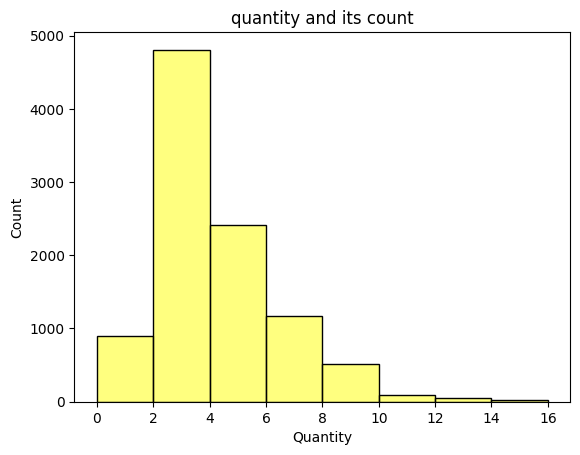

In [55]:
bin=[0,2,4,6,8,10,12,14,16]
sns.histplot(x='Quantity', bins=bin, data=walmart, color="yellow", alpha=0.5)
plt.title("quantity and its count")
#this histogram show the quantity and its count

COUNT PLOT:

In [56]:
walmart.value_counts("Category")

Category
Office Supplies    6020
Furniture          2119
Technology         1844
dtype: int64

Text(0.5, 1.0, 'Category and its count')

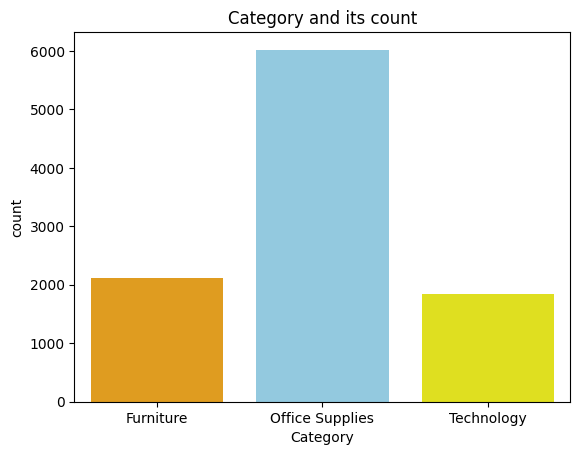

In [57]:
sns.countplot(x='Category', data=walmart, palette=["orange","skyblue","yellow"])
plt.title("Category and its count")
#here the office supplies have the highest count

In [58]:
#walmart=walmart.sort_values(by="Profit", ascending=False)
#plt.bar(walmart['Category'], walmart['Profit'], color='skyblue')plt.xlabel('Category')
#plt.ylabel('Profit')
#plt.title('Profit and Loss by Category')
#technology category has more profit value as well as the loss

Text(0.5, 1.0, 'Sales by Category')

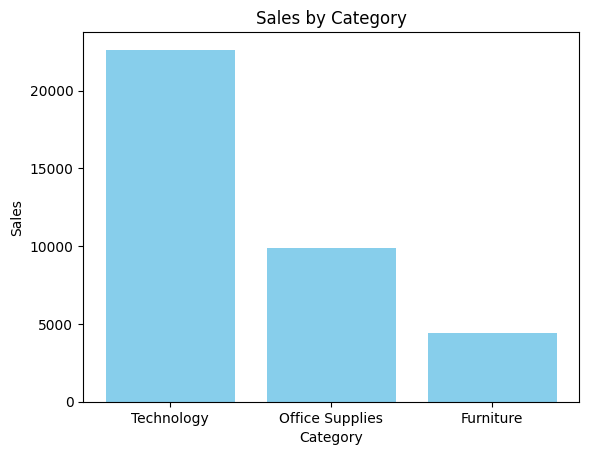

In [59]:
walmart=walmart.sort_values(by="Sales", ascending=False)
plt.bar(walmart['Category'], walmart['Sales'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales by Category')
#technology category has more sales as compared to other two

<Axes: xlabel='Category', ylabel='Sales'>

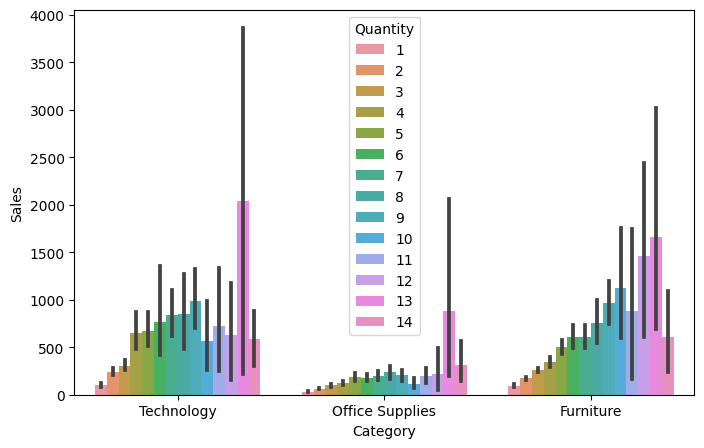

In [60]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Sales', hue='Quantity', data= walmart)

Text(0, 0.5, '')

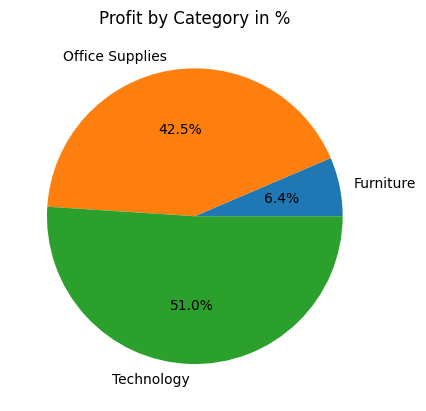

In [61]:
category_profit = walmart.groupby('Category')['Profit'].sum()
category_profit.plot(kind='pie', autopct='%1.1f%%')
plt.title("Profit by Category in %")
plt.ylabel('')

Text(0, 0.5, '')

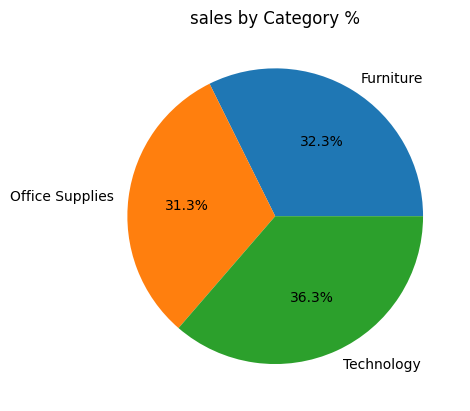

In [62]:
category_profit = walmart.groupby('Category')['Sales'].sum()
category_profit.plot(kind='pie', autopct='%1.1f%%')
plt.title("sales by Category %")
plt.ylabel('')

Text(0, 0.5, '')

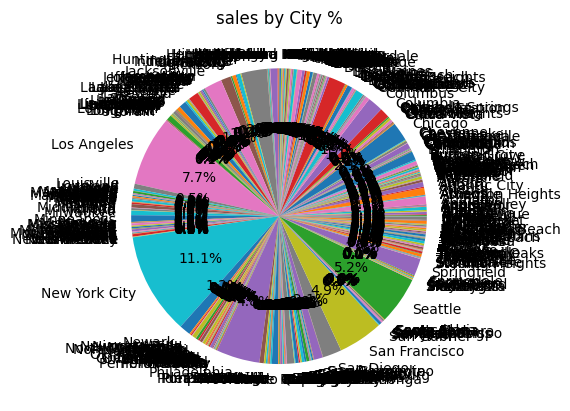

In [63]:
category_profit = walmart.groupby('City')['Sales'].sum()
category_profit.plot(kind='pie', autopct='%1.1f%%')
plt.title("sales by City %")
plt.ylabel('')
#The New York city has the highest number of sales

There is a positive correlation between Sales and Profit.


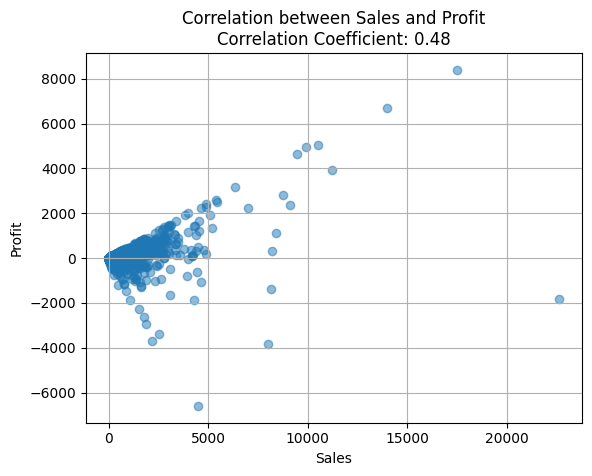

In [64]:
# Calculate the correlation coefficient between Sales and Profit
correlation_coefficient = walmart['Sales'].corr(walmart['Profit'])

# Create a scatter plot to visualize the relationship
plt.scatter(walmart['Sales'], walmart['Profit'], alpha=0.5)
plt.title(f"Correlation between Sales and Profit\nCorrelation Coefficient: {correlation_coefficient:.2f}")
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)

# Determine if there's a positive correlation
if correlation_coefficient > 0:
    print("There is a positive correlation between Sales and Profit.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between Sales and Profit.")
else:
    print("There is no significant correlation between Sales and Profit.")


There is a positive correlation between Profit and Quantity.


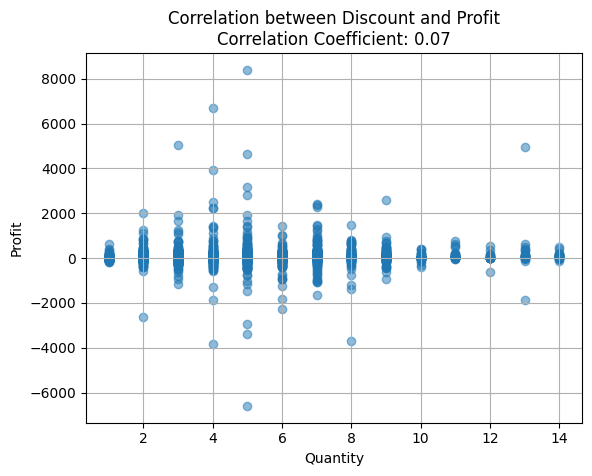

In [65]:
# Calculate the correlation coefficient between Profit and Discount
correlation_coefficient = walmart['Quantity'].corr(walmart['Profit'])

# Create a scatter plot to visualize the relationship
plt.scatter(walmart['Quantity'], walmart['Profit'], alpha=0.5)
plt.title(f"Correlation between Discount and Profit\nCorrelation Coefficient: {correlation_coefficient:.2f}")
plt.xlabel("Quantity")
plt.ylabel("Profit")
plt.grid(True)

# Determine if there's a positive correlation
if correlation_coefficient > 0:
    print("There is a positive correlation between Profit and Quantity.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between Profit and Quantity.")
else:
    print("There is no significant correlation between Profit and Quantity.")


There is a negative correlation between Sales and Discount.


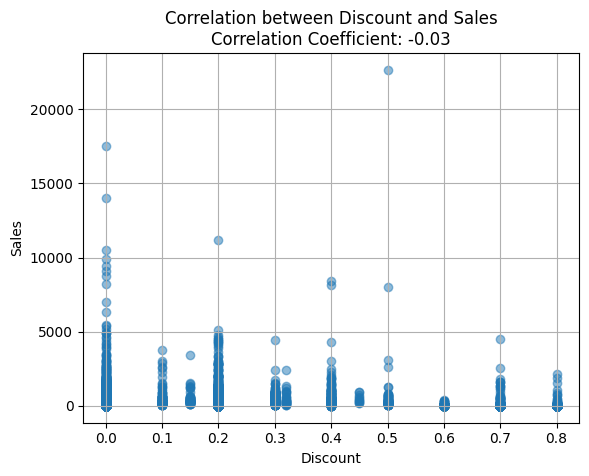

In [66]:
# Calculate the correlation coefficient between Sales and Discount
correlation_coefficient = walmart['Discount'].corr(walmart['Sales'])

# Create a scatter plot to visualize the relationship
plt.scatter(walmart['Discount'], walmart['Sales'], alpha=0.5)
plt.title(f"Correlation between Discount and Sales\nCorrelation Coefficient: {correlation_coefficient:.2f}")
plt.xlabel("Discount")
plt.ylabel("Sales")
plt.grid(True)

# Determine if there's a positive correlation
if correlation_coefficient > 0:
    print("There is a positive correlation between Sales and Discount.")
elif correlation_coefficient < 0:
    print("There is a negative correlation between Sales and Discount.")
else:
    print("There is no significant correlation between Sales and Discount.")

<ipython-input-67-0966444d4b40>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(walmart.corr(), annot=True, cmap="Blues")


<Axes: >

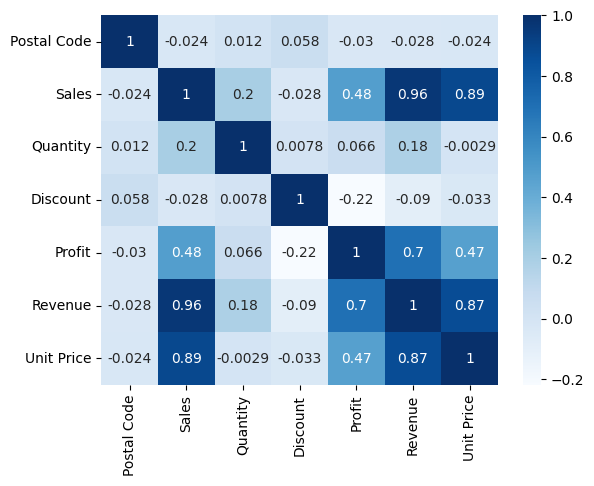

In [67]:
sns.heatmap(walmart.corr(), annot=True, cmap="Blues")


Text(0, 0.5, 'Columns')

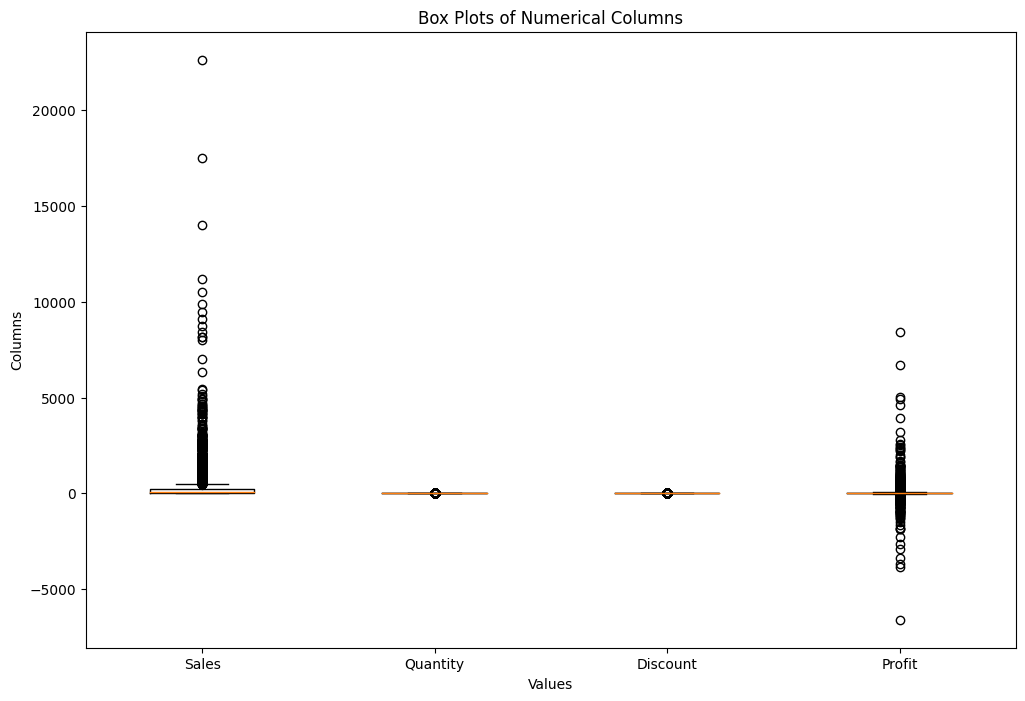

In [68]:
numerical_columns = ['Sales', 'Quantity', 'Discount', 'Profit']
plt.figure(figsize=(12, 8))
plt.boxplot([walmart[column] for column in numerical_columns], labels=numerical_columns, vert=True)
plt.title("Box Plots of Numerical Columns")
plt.xlabel("Values")
plt.ylabel("Columns")

**DATA PREPARATION:**

In [69]:
#Using LabelEncoder, the above mentioned categorical features are converted to numerical as we need to
#pass numerical variables while executing Linear Regression Algorithm.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder();
walmart["Order ID"]=le.fit_transform(walmart["Order ID"])
walmart["Order Date"]=le.fit_transform(walmart["Order Date"])
walmart["Ship Date"]=le.fit_transform(walmart["Ship Date"])
walmart["Customer Name"]=le.fit_transform(walmart["Customer Name"])
walmart["Country"]=le.fit_transform(walmart["Country"])
walmart["City"]=le.fit_transform(walmart["City"])
walmart["State"]=le.fit_transform(walmart["State"])
walmart["Postal Code"]=le.fit_transform(walmart["Postal Code"])
walmart["Region"]=le.fit_transform(walmart["Region"])
walmart["Category"]=le.fit_transform(walmart["Category"])
walmart["Sub-Category"]=le.fit_transform(walmart["Sub-Category"])
walmart["Product Name"]=le.fit_transform(walmart["Product Name"])
walmart["Sales"]=le.fit_transform(walmart["Sales"])
walmart["Quantity"]=le.fit_transform(walmart["Quantity"])
walmart["Discount"]=le.fit_transform(walmart["Discount"])
walmart["Profit"]=le.fit_transform(walmart["Profit"])
walmart["Revenue"]=le.fit_transform(walmart["Revenue"])
walmart["Unit Price"]=le.fit_transform(walmart["Unit Price"])
walmart.head()


,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Revenue,Unit Price
2697,544,694,967,686,0,216,8,149,2,2,11,443,5818,5,8,9,6899,3589
6826,1991,109,430,730,0,233,12,256,0,2,6,403,5817,4,0,756,6900,3588
8153,3594,943,1103,622,0,452,45,621,3,2,6,403,5816,3,0,755,6898,3587
2623,3347,926,1085,757,0,329,30,54,1,2,6,403,5815,3,3,751,6896,3586
4190,4124,723,1001,334,0,330,6,84,1,2,6,403,5814,2,0,754,6897,3587


**Multi-Linear Regression Model**

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the independent variables (features) and the dependent variable (target)
X = walmart[['Sales', 'Quantity', 'Discount', 'Profit','Unit Price']]
y = walmart['Revenue']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Mean Squared Error: 153762.58659207032
Root Mean Squared Error: 392.1257280414922
R-squared: 0.9594618571098177
Coefficients: [   1.23555439  -43.04493259 -108.79673922    2.23239797   -0.28656498]
Intercept: 141.55402537035707


**-----END OF THE ANALYSIS------**

    ------the below models are build just for understanding purpose--------

Model using UnitPrice feature

In [70]:
#Here, all the features except 'Price' are stored in the X variable and the target variable is passed as 'Price'
df=pd.DataFrame(walmart)
x=df.drop("Unit Price", axis=1 )
y=walmart['Unit Price']

In [71]:
#The whole data has been split into training data and testing data.
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7986, 17)
(1997, 17)
(7986,)
(1997,)


In [72]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [73]:
regressor.coef_

array([ 2.57082537e-03,  7.09613545e-03, -4.62042559e-03,  8.11807208e-04,
        7.09432513e-14, -4.95373151e-03,  3.10665243e-01, -1.70347333e-02,
        5.12399935e+00, -6.55213970e+00,  1.61369226e+00,  5.73327101e-03,
        6.67963839e-01, -1.45137202e+02, -7.51132742e+00,  1.75695065e-01,
       -4.00214188e-02])

In [74]:
regressor.intercept_

395.2314024370212

In [75]:
#model evaluation for training set
predicted_y_train=regressor.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, predicted_y_train)))
r2 = r2_score(y_train, predicted_y_train)
print('The models training set performance:-')
print(f"RMSE is:{rmse}")
print(f'R2 score is:{r2}')
print("-------------------------------------------------------------------------")


#model evaluation for testing set
predicted_y_test=regressor.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, predicted_y_test)))
r2 = r2_score(y_test, predicted_y_test)
print('The models testing set performance:-')
print(f"RMSE is:{rmse}")
print(f'R2 score is:{r2}')

The models training set performance:-
RMSE is:153.47469576775984
R2 score is:0.9764424338611638
-------------------------------------------------------------------------
The models testing set performance:-
RMSE is:150.4080341711384
R2 score is:0.9766122118714269


Model using Profit feature

In [76]:
#Here, all the features except 'Profit' are stored in the X variable and the target variable is passed as 'Price'
df=pd.DataFrame(walmart)
x=df.drop("Profit", axis=1 )
y=walmart['Profit']

In [77]:
#The whole data has been split into training data and testing data.
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7986, 17)
(1997, 17)
(7986,)
(1997,)


In [78]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [79]:
regressor.coef_

array([-8.50479035e-04, -1.80596885e-03,  6.64576327e-04,  1.07152441e-03,
        2.77583512e-13, -9.41051594e-03, -3.73087670e-02, -2.06924180e-03,
       -1.81960679e+00,  1.50237934e+01, -1.92508640e+00, -1.85544290e-03,
       -6.16324754e-02,  6.35155045e+00, -2.75754744e+00,  5.38650717e-02,
        2.98810474e-02])

In [80]:
regressor.intercept_

263.8577053390546

In [81]:
#model evaluation for training set
predicted_y_train=regressor.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, predicted_y_train)))
r2 = r2_score(y_train, predicted_y_train)
print('The models training set performance:-')
print(f"RMSE is:{rmse}")
print(f'R2 score is:{r2}')
print("-------------------------------------------------------------------------")


#model evaluation for testing set
predicted_y_test=regressor.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, predicted_y_test)))
r2 = r2_score(y_test, predicted_y_test)
print('The models testing set performance:-')
print(f"RMSE is:{rmse}")
print(f'R2 score is:{r2}')

The models training set performance:-
RMSE is:63.29288735648706
R2 score is:0.3819493579435569
-------------------------------------------------------------------------
The models testing set performance:-
RMSE is:59.558351643622515
R2 score is:0.3779236587627678


Model using Sales feature

In [82]:
#Here, all the features except 'Sales' are stored in the X variable and the target variable is passed as 'Price'
df=pd.DataFrame(walmart)
x=df.drop("Sales", axis=1 )
y=walmart['Sales']

#The whole data has been split into training data and testing data.
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7986, 17)
(1997, 17)
(7986,)
(1997,)


In [83]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [84]:
regressor.coef_

array([-1.06051641e-03, -1.20377364e-02,  2.12205442e-03,  6.89140621e-03,
        4.82724971e-13,  1.71285214e-02, -6.33098884e-01,  3.33106050e-02,
       -1.16725920e+01,  2.53920301e+00, -1.66130244e+00, -1.34720608e-02,
        1.61220467e+02,  3.37910501e+01, -5.90070940e-01,  2.85967309e-01,
        1.08763662e+00])

In [85]:
regressor.intercept_

-425.8961172750346

In [86]:
#model evaluation for training set
predicted_y_train=regressor.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, predicted_y_train)))
r2 = r2_score(y_train, predicted_y_train)
print('The models training set performance:-')
print(f"RMSE is:{rmse}")
print(f'R2 score is:{r2}')
print("-------------------------------------------------------------------------")


#model evaluation for testing set
predicted_y_test=regressor.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, predicted_y_test)))
r2 = r2_score(y_test, predicted_y_test)
print('The models testing set performance:-')
print(f"RMSE is:{rmse}")
print(f'R2 score is:{r2}')

The models training set performance:-
RMSE is:195.8403677134211
R2 score is:0.9859846438321336
-------------------------------------------------------------------------
The models testing set performance:-
RMSE is:185.73026209779246
R2 score is:0.9866972924741136


Model using Revenue feature

In [87]:
#Here, all the features except 'Sales' are stored in the X variable and the target variable is passed as 'Price'
df=pd.DataFrame(walmart)
x=df.drop("Revenue", axis=1 )
y=walmart['Revenue']

#The whole data has been split into training data and testing data.
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7986, 17)
(1997, 17)
(7986,)
(1997,)


In [88]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [89]:
regressor.coef_

array([-5.37920416e-03,  1.69126428e-02,  6.76445488e-03, -2.91937496e-02,
       -5.53335155e-13, -3.79577513e-02,  1.22496619e+00, -6.54892827e-02,
        2.70553631e+01,  1.06548758e+01,  4.20172468e+00,  2.36659161e-02,
        1.22768893e+00, -4.01321909e+01, -1.05535051e+02,  2.21398059e+00,
       -2.79766237e-01])

In [90]:
regressor.intercept_

47.781137601433784

In [91]:
#model evaluation for training set
predicted_y_train=regressor.predict(x_train)
rmse=(np.sqrt(mean_squared_error(y_train, predicted_y_train)))
r2 = r2_score(y_train, predicted_y_train)
print('The models training set performance:-')
print(f"RMSE is:{rmse}")
print(f'R2 score is:{r2}')
print("-------------------------------------------------------------------------")


#model evaluation for testing set
predicted_y_test=regressor.predict(x_test)
rmse=(np.sqrt(mean_squared_error(y_test, predicted_y_test)))
r2 = r2_score(y_test, predicted_y_test)
print('The models testing set performance:-')
print(f"RMSE is:{rmse}")
print(f'R2 score is:{r2}')

The models training set performance:-
RMSE is:405.77771442453485
R2 score is:0.9562736115825365
-------------------------------------------------------------------------
The models testing set performance:-
RMSE is:355.74429241313396
R2 score is:0.9640694345344419
